In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
import h5py
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

In [3]:
PROJECT_PATH = '../'
import sys
sys.path.insert(0, PROJECT_PATH)

In [87]:
from PIML.box.boxW import BoxW

In [88]:
from PIML.util.util import Util


In [89]:
b = BoxW()

In [90]:
W="RedM"; R="R"; Res=5000;step=10; topk=16;
b.init(W,[R], Res, step, topk=topk, onPCA=1)

=============================PREPARING R=====================
#220 R=1000.00
sky_H (2204,)
Top eigs  [1.0532e+02 7.0700e+00 5.2000e+00 1.4400e+00 1.2100e+00 7.6000e-01
 5.7000e-01 4.9000e-01 3.5000e-01 2.8000e-01 2.3000e-01 1.7000e-01
 1.4000e-01 1.1000e-01 1.0000e-01 9.0000e-02]
Building RBF with gaussan kernel on data shape (2880,)
Building RBF with gaussan kernel on data shape (2880, 16)
error: 2.4504848187193207e-08


In [91]:
b.run_step_rbf("B")

=============================PREPARING B=====================
#220 R=1000.00
sky_H (2204,)
Top eigs  [1.9403e+02 1.4640e+01 5.7500e+00 1.8700e+00 9.3000e-01 7.3000e-01
 6.0000e-01 3.4000e-01 2.4000e-01 1.7000e-01 1.2000e-01 1.0000e-01
 9.0000e-02 8.0000e-02 6.0000e-02 5.0000e-02]
Building RBF with gaussan kernel on data shape (5760,)
Building RBF with gaussan kernel on data shape (5760, 16)
error: 3.865481416544084e-07


In [116]:
b.set_eigv()

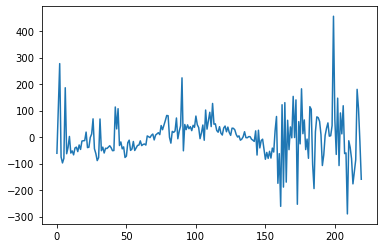

In [63]:
pmt=b.DPhyMid["B"]
# plt.plot()
plt.plot(interp_f(pmt) - flux[Util.get_fdx_from_pmt(pmt, b.DPara["B"])])

In [46]:
b.DRbf_ak[R](b.DPara[R][0])

array([-1.58599161e+00, -4.69300820e-02, -1.00219655e-01,  3.09597509e-02,
        1.20876399e-02, -3.74110728e-03, -4.93205734e-03, -2.60924360e-03,
       -1.43458789e-03,  5.35389248e-03,  3.82345435e-03, -5.81621497e-03,
        1.91609078e-03,  2.65193069e-03, -2.89309808e-03,  6.67209554e-04])

In [93]:
_, pmts = b.get_random_pmt_R(R, 10)
fluxs = b.DRbf_flux[R](pmts)

In [94]:
sigma = b.DRbf_sigma[R](pmts, 2, divide=0)
noiseMat = np.random.normal(0, sigma, sigma.shape)